In [1]:
print("Hello world ")

Hello world 


In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd

In [3]:
!pwd


/mnt/c/Users/UTSEUS/dataanalysis


# Import of  Lille metropolis Data

In [4]:
mel_cities = gpd.read_file('2024-project/2024-project/cartographic-resources/mel_communes.zip')


In [5]:
print(mel_cities.columns)
print(dfe.columns)


Index(['insee', 'nom', 'ut', 'territoire', 'surface', 'perimetre',
       'code_posta', 'geometry'],
      dtype='object')
Index(['u', 'v', 'path', 'osm_id', 'highway', 'level', 'lanes', 'width',
       'bicycle', 'bicycle_safety', 'foot', 'foot_safety', 'max_speed',
       'motorcar', 'geometry'],
      dtype='object')


Index(['insee', 'nom', 'ut', 'territoire', 'surface', 'perimetre',
       'code_posta', 'geometry'],
      dtype='object')
(97, 8)


<Axes: >

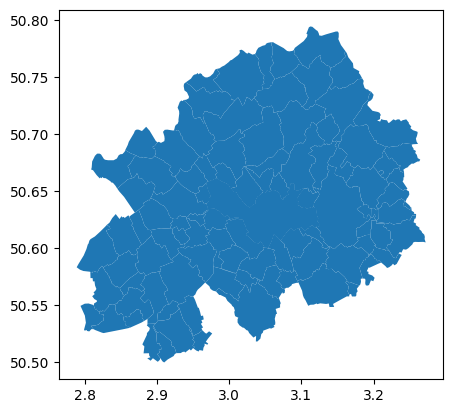

In [79]:
print(mel_cities.columns)
print(mel_cities.shape)
mel_cities.plot()


In [31]:
print(mel_cities[mel_cities['nom'] == 'Lille'])

    insee    nom            ut             territoire       surface  \
82  59350  Lille  LILLE-SECLIN  LILLE-LOMME-HELLEMMES  3.490799e+07   

       perimetre  code_posta  \
82  43602.321304     59000.0   

                                             geometry  
82  POLYGON ((2.97039 50.63971, 2.97269 50.64182, ...  


In [7]:
import os

folder_path = '2024-project/2024-project/cartographic-resources/IRIS-GE_2-0_SHP_LAMB93_D059-2020'

try:
    files = os.listdir(folder_path)
    for file in files:
        print(file)
except FileNotFoundError:
    print(f"The specified folder '{folder_path}' does not exist.")
except Exception as e:
    print(f"An error occurred: {e}")


IRIS_GE.CPG
IRIS_GE.DBF
IRIS_GE.PRJ
IRIS_GE.SHP
IRIS_GE.SHX
LISTE.csv


In [8]:
nordData = gpd.read_file('2024-project/2024-project/cartographic-resources/IRIS-GE_2-0_SHP_LAMB93_D059-2020/IRIS_GE.SHX')
nordData.columns

print(nordData)

     INSEE_COM              NOM_COM  IRIS  CODE_IRIS                NOM_IRIS  \
0        59433             Nieurlet  0000  594330000                Nieurlet   
1        59273           Gravelines  0101  592730101     Petit Fort Philippe   
2        59436           Noordpeene  0000  594360000              Noordpeene   
3        59350                Lille  0302  593500302        Vauban-Esquermes   
4        59539  Saint-Pierre-Brouck  0000  595390000     Saint-Pierre-Brouck   
...        ...                  ...   ...        ...                     ...   
1341     59392             Maubeuge  0201  593920201        Faubourg de Mons   
1342     59392             Maubeuge  0202  593920202             Pont Allant   
1343     59324              Jeumont  0106  593240106  Quewette et Bersillies   
1344     59324              Jeumont  0105  593240105            Le Lambreçon   
1345     59324              Jeumont  0101  593240101        Zone d'Activités   

     TYP_IRIS                          

In [9]:
lilleMetropolis = nordData[nordData.INSEE_COM.isin(mel_cities['insee']) ]
lilleMetropolis.shape

(517, 7)

<Axes: >

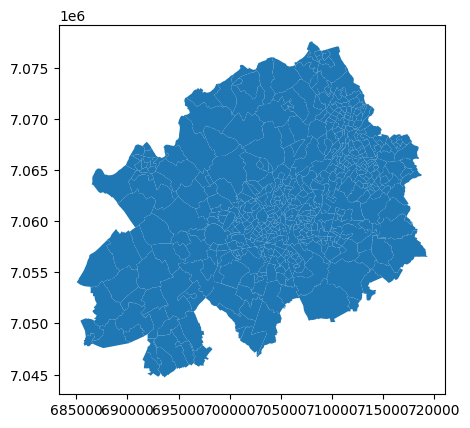

In [10]:
lilleMetropolis.plot()

<Axes: >

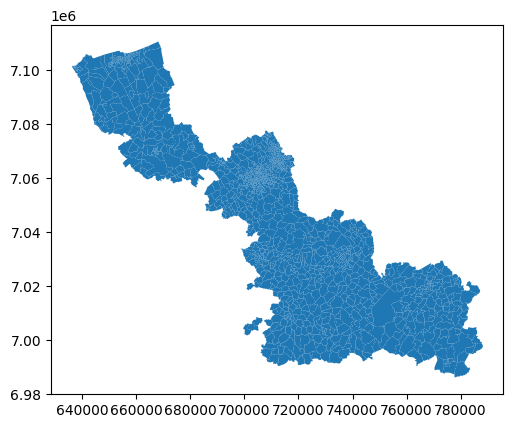

In [11]:
nordData.plot()

# Zones d'activites

In [15]:
print(lilleMetropolis.columns)

Index(['INSEE_COM', 'NOM_COM', 'IRIS', 'CODE_IRIS', 'NOM_IRIS', 'TYP_IRIS',
       'geometry'],
      dtype='object')


In [16]:
scoreDf = lilleMetropolis[['CODE_IRIS', 'geometry']].copy()
print(scoreDf['CODE_IRIS'].duplicated().any())


False


In [17]:
import matplotlib.pyplot as plt

scoreDf['Business_area'] = lilleMetropolis['TYP_IRIS'] == 'A'

print(scoreDf['Business_area'])


3        True
15      False
21      False
29      False
34      False
        ...  
1182    False
1183    False
1184    False
1185    False
1186    False
Name: Business_area, Length: 517, dtype: bool


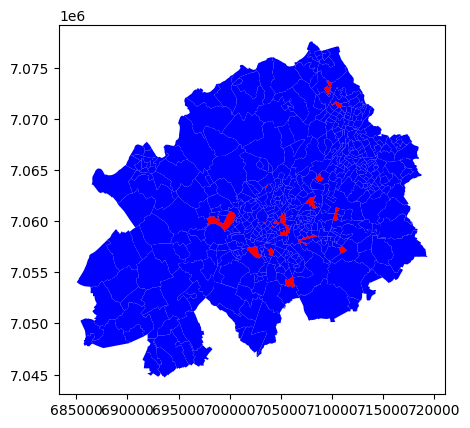

Index(['CODE_IRIS', 'geometry', 'Business_area'], dtype='object')


In [18]:
# Plot the complete DataFrame in blue
ax = lilleMetropolis.plot(color='blue')

# Plot the subset DataFrame in red
scoreDf[scoreDf['Business_area'] == True].plot(ax=ax, color='red')

# Show the plot
plt.show()

print(scoreDf.columns)




# Zones d'habitat

3       False
15      False
21       True
29      False
34      False
        ...  
1182     True
1183     True
1184     True
1185     True
1186     True
Name: Residential_area, Length: 517, dtype: bool


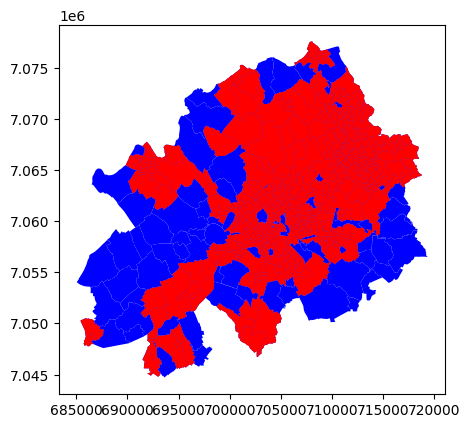

In [91]:
import matplotlib.pyplot as plt

scoreDf['Residential_area'] = lilleMetropolis['TYP_IRIS'] == 'H'

print(scoreDf['Residential_area'])
# Plot the complete DataFrame in blue
ax = lilleMetropolis.plot(color='blue')

# Plot the subset DataFrame in red
scoreDf[scoreDf['Residential_area'] == True].plot(ax=ax, color='red')

# Show the plot
plt.show()

# Distance entre 2 iris

In [19]:
dfe = gpd.read_parquet('2024-project/2024-project/cartographic-resources/mel.parquet')


In [41]:
dfe.info()
print(dfe.columns)


dfe.length

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 278813 entries, 1108327 to 1108326
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   u               278813 non-null  int64   
 1   v               278813 non-null  int64   
 2   path            278813 non-null  object  
 3   osm_id          278813 non-null  object  
 4   highway         278813 non-null  object  
 5   level           278813 non-null  int64   
 6   lanes           278813 non-null  int64   
 7   width           278813 non-null  float64 
 8   bicycle         278813 non-null  int64   
 9   bicycle_safety  278813 non-null  int64   
 10  foot            278813 non-null  int64   
 11  foot_safety     278813 non-null  int64   
 12  max_speed       278813 non-null  int64   
 13  motorcar        278813 non-null  int64   
 14  geometry        278813 non-null  geometry
 15  time            278813 non-null  float64 
dtypes: float64(2), geometry(1), 

edge_id
1108327     201.287237
1109060     509.863817
1109209    1175.172534
1108329     447.299456
1108330     228.188361
              ...     
967294        3.357317
1108321      14.566394
967318       19.007188
1108325      97.836717
1108326      97.836717
Length: 278813, dtype: float64

In [24]:
dfe.sample(1)
dfe['bicycle_safety']


edge_id
1108327   -1
1109060   -1
1109209   -1
1108329   -1
1108330   -1
          ..
967294    -1
1108321    3
967318     1
1108325    1
1108326    1
Name: bicycle_safety, Length: 278813, dtype: int64

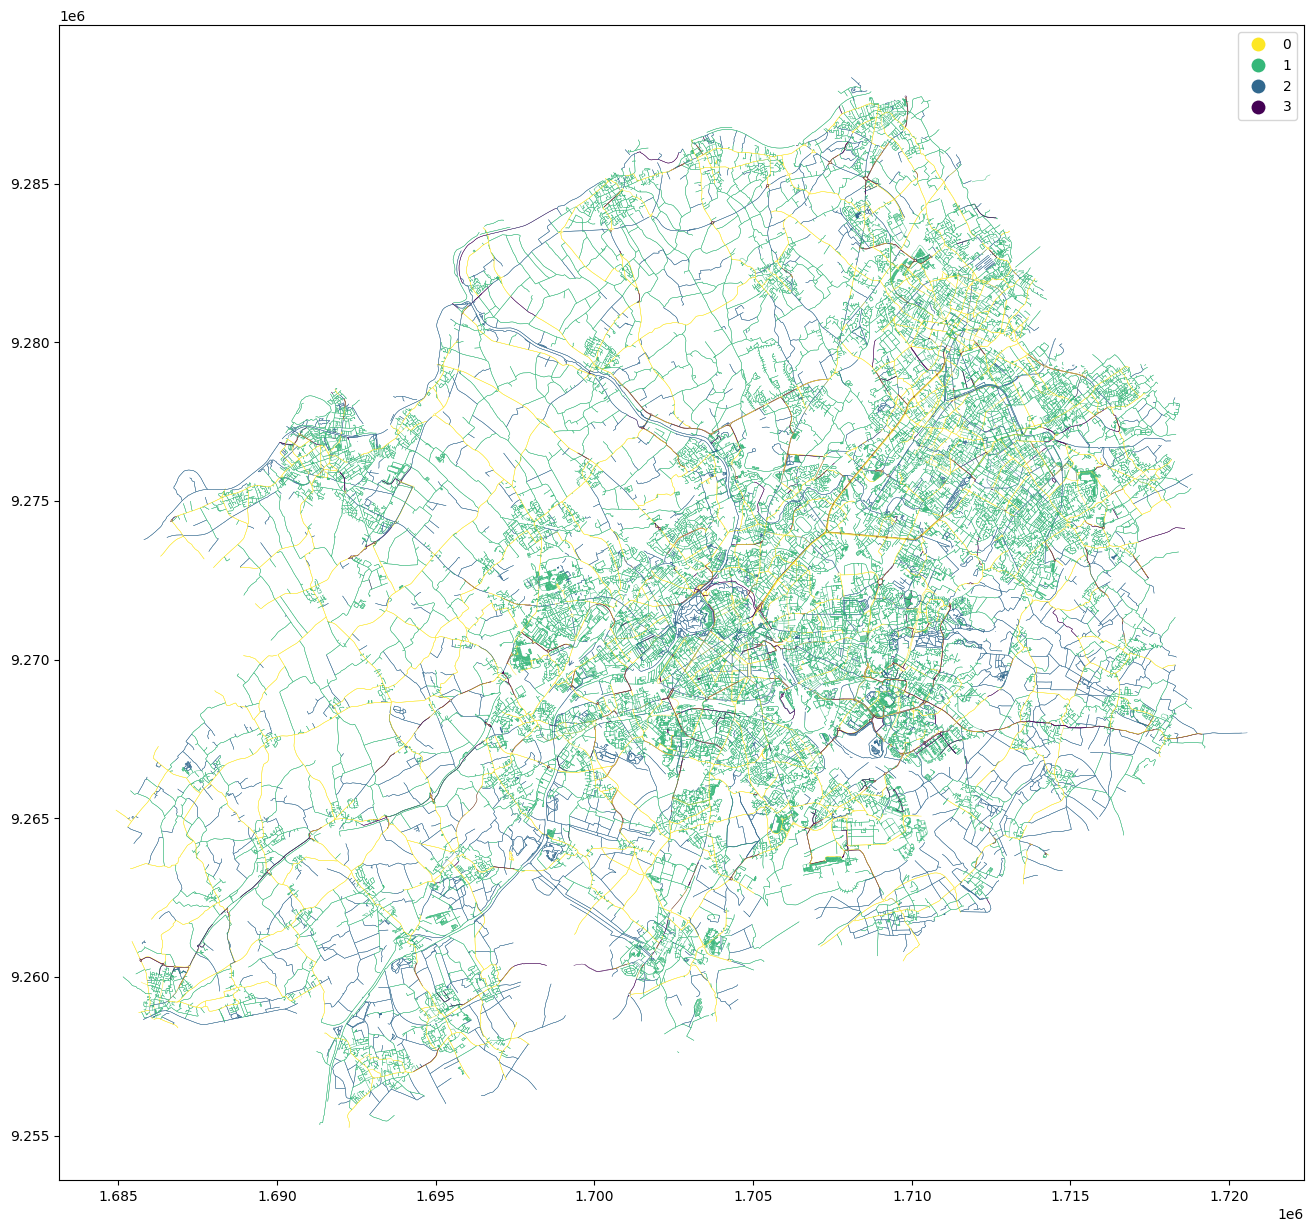

In [31]:
ax = dfe[dfe.bicycle == 1].plot(column='bicycle_safety', cmap='viridis_r', categorical=True, linewidth=0.3, figsize=(20,15), legend = 'legende')



In [32]:
fig = ax.get_figure()
ax.get_legend().set_title('bicycle_safety\n0 is worst')

In [33]:
average_speed_kph = 16
average_speed_mps = average_speed_kph * 1000 / 3600
dfe['time'] = dfe.length / average_speed_mps

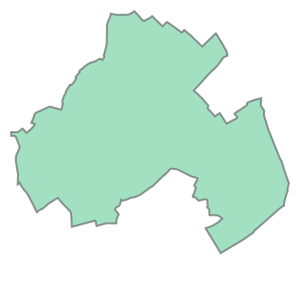

In [65]:
lilleMetropolis['geometry'].iloc[20]

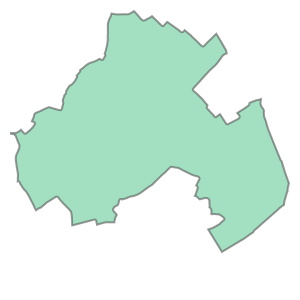

In [90]:
lilleMetropolis
lilleMetropolisBuffed = lilleMetropolis.to_crs(3950)
lilleMetropolisBuffed.geometry = lilleMetropolisBuffed.geometry.apply(lambda g: g.buffer(-20))

lilleMetropolisBuffed['geometry'].iloc[20]


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/tmp/ipykernel_1257/917178133.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: IGNF:LAMB93
Right CRS: EPSG:3950

  irisMEL = gpd.sjoin(lilleMetropolis, lilleMetropolisBuffed,op='intersects')
/tmp/ipykernel_1257/917178133.py:2: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  ax = irisMEL.plot()


<Axes: >

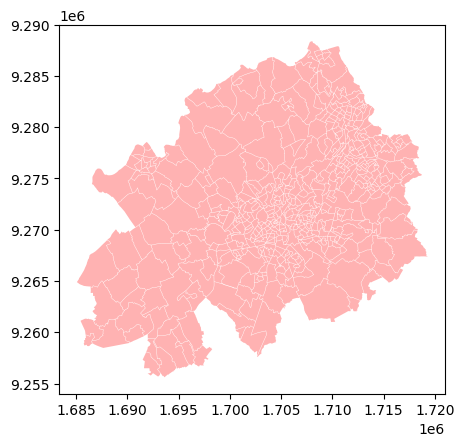

In [93]:
irisMEL = gpd.sjoin(lilleMetropolis, lilleMetropolisBuffed,op='intersects')
ax = irisMEL.plot()

lilleMetropolisBuffed.plot(ax=ax,color='r',alpha=0.3)

In [92]:
irisMEL.columns

Index(['INSEE_COM_left', 'NOM_COM_left', 'IRIS_left', 'CODE_IRIS_left',
       'NOM_IRIS_left', 'TYP_IRIS_left', 'geometry', 'index_right',
       'INSEE_COM_right', 'NOM_COM_right', 'IRIS_right', 'CODE_IRIS_right',
       'NOM_IRIS_right', 'TYP_IRIS_right'],
      dtype='object')

In [162]:
lilleMetropolisBuffed

,INSEE_COM,NOM_COM,IRIS,CODE_IRIS,NOM_IRIS,TYP_IRIS,geometry
3,59350,Lille,0302,593500302,Vauban-Esquermes,A,"POLYGON ((1703330.672 9270692.202, 1703411.422..."
15,59332,Lannoy,0000,593320000,Lannoy,Z,"POLYGON ((1714577.190 9274134.318, 1714588.484..."
21,59220,Faches-Thumesnil,0101,592200101,Thumesnil Nord,H,"POLYGON ((1704201.105 9267525.049, 1704211.192..."
29,59670,Don,0000,596700000,Don,Z,"POLYGON ((1692968.757 9259662.783, 1692973.200..."
34,59005,Allennes-les-Marais,0000,590050000,Allennes-les-Marais,Z,"POLYGON ((1694854.807 9261220.289, 1694890.813..."
...,...,...,...,...,...,...,...
1182,59650,Wattrelos,0605,596500605,Beaulieu 3,H,"POLYGON ((1715983.047 9278361.895, 1716011.492..."
1183,59650,Wattrelos,0603,596500603,Beaulieu 1,H,"POLYGON ((1716215.091 9278560.325, 1716216.670..."
1184,59339,Leers,0101,593390101,Centre,H,"POLYGON ((1716679.447 9275383.675, 1716680.425..."
1185,59339,Leers,0103,593390103,Est,H,"MULTIPOLYGON (((1716631.400 9274868.126, 17166..."


In [160]:
iris = lilleMetropolisBuffed[lilleMetropolisBuffed.IRIS == '0804'].copy(deep=True)
iris


,INSEE_COM,NOM_COM,IRIS,CODE_IRIS,NOM_IRIS,TYP_IRIS,geometry
89,59350,Lille,0804,593500804,Aviateurs,H,"POLYGON ((1701403.371 9269617.602, 1701397.028..."


<Axes: >

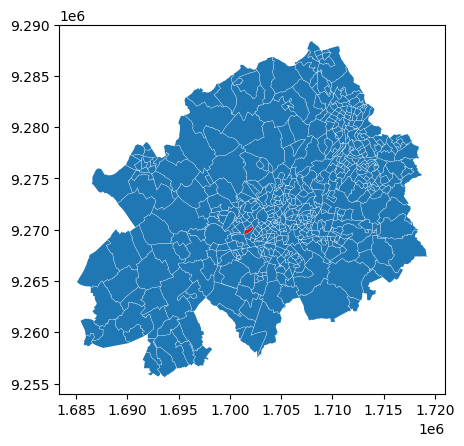

In [95]:
ax = lilleMetropolisBuffed.plot(linewidth=0.1)
iris.plot(ax=ax, color='red', linewidth=0.1)

In [96]:
x = iris.iat[0, 6]
print('x original coordinates length', len(x.exterior.coords))
print(x.area)
s = x.simplify(50, preserve_topology=True)
print('s simplified coordinates length', len(s.exterior.coords))
print(s.area)

x original coordinates length 200
228416.41340527005
s simplified coordinates length 9
216400.13139157125


In [99]:
iris_df = pd.DataFrame.from_records(s.exterior.coords, columns=['longitude','latitude'])
iris_df = gpd.GeoDataFrame(iris_df, geometry=gpd.points_from_xy(iris_df.longitude, iris_df.latitude), crs=3950)
iris_df.head()


,longitude,latitude,geometry
0,1.701403e+06,9.269618e+06,POINT (1701403.371 9269617.602)
1,1.701511e+06,9.269949e+06,POINT (1701511.024 9269949.388)
2,1.701685e+06,9.270050e+06,POINT (1701685.016 9270049.597)
3,1.701754e+06,9.269970e+06,POINT (1701753.782 9269970.437)
4,1.701974e+06,9.270166e+06,POINT (1701973.788 9270165.738)


In [190]:
dfe_bike = dfe[dfe['bicycle']>0].copy(deep=True)
dfe_bike = dfe_bike.dropna()
dfe_bike = dfe_bike[~(dfe_bike.is_empty | dfe_bike.geometry.isna())]
dfe_bike = dfe_bike.reset_index(drop=True)
dfe_bike.to_crs(3950)

,u,v,path,osm_id,highway,level,lanes,width,bicycle,bicycle_safety,foot,foot_safety,max_speed,motorcar,geometry,time
0,4028550600,4028550592,"[4028550600, 6532006256, 2091208107, 209120814...",27799236,primary,6,1,3.0,1,0,1,0,-1,1,"LINESTRING (1709332.359 9267788.509, 1709353.1...",72.449184
1,133263733,2562615356,"[133263733, 2562615356]",14037709,residential,3,1,3.0,1,1,1,1,30,1,"LINESTRING (1704072.352 9269630.390, 1704068.8...",2.180441
2,133263733,2562615343,"[133263733, 2562615343]",39178013,residential,3,1,3.0,1,1,1,1,30,1,"LINESTRING (1704072.352 9269630.390, 1704075.6...",2.223986
3,133263733,133267912,"[133263733, 133267912]",923010605,tertiary,4,2,6.0,1,0,1,0,30,1,"LINESTRING (1704072.352 9269630.390, 1704167.7...",21.479838
4,133263733,2562615348,"[133263733, 2562615350, 2562615348]",923010605,tertiary,4,2,6.0,1,0,1,0,30,1,"LINESTRING (1704072.352 9269630.390, 1704066.2...",13.509295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198543,8831642997,695633635,"[8831642997, 8831642998, 8831642999, 695633635]",954211070,cycleway,2,1,1.5,1,3,0,-1,-1,0,"LINESTRING (1711950.654 9278691.760, 1711896.3...",41.027093
198544,8831643011,6964278831,"[8831643011, 8831642996, 6964278831]",954211077,cycleway,2,1,1.5,1,3,1,3,-1,0,"LINESTRING (1711966.843 9278658.102, 1711964.5...",3.277439
198545,8833207562,8833207561,"[8833207562, 8833207561]",954381892,service,2,1,1.5,1,1,1,1,-1,1,"LINESTRING (1696086.591 9263303.937, 1696068.8...",4.276617
198546,8833207562,8833207562,"[8833207562, 8833207563, 8833207564, 883320756...",954381892,service,2,1,1.5,1,1,1,1,-1,1,"LINESTRING (1696086.591 9263303.937, 1696098.8...",22.013261


<Axes: >

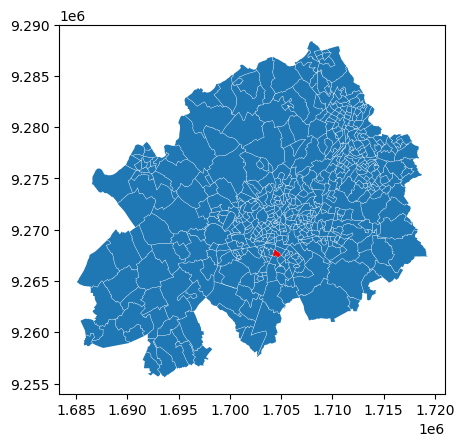

In [189]:
ax = lilleMetropolisBuffed.plot(linewidth=0.1)

geometry_to_plot = lilleMetropolisBuffed.iloc[2]['geometry']

gdf_to_plot = gpd.GeoDataFrame(geometry=[geometry_to_plot])

gdf_to_plot.plot(ax=ax, color='red', linewidth=4)


In [116]:
dfe_bike.head()

,u,v,path,osm_id,highway,level,lanes,width,bicycle,bicycle_safety,foot,foot_safety,max_speed,motorcar,geometry,time
edge_id,,,,,,,,,,,,,,,,
970003,4028550600,4028550592,"[4028550600, 6532006256, 2091208107, 209120814...",27799236,primary,6,1,3.0,1,0,1,0,-1,1,"LINESTRING (1709332.359 9267788.509, 1709353.1...",72.449184
122,133263733,2562615356,"[133263733, 2562615356]",14037709,residential,3,1,3.0,1,1,1,1,30,1,"LINESTRING (1704072.352 9269630.390, 1704068.8...",2.180441
85548,133263733,2562615343,"[133263733, 2562615343]",39178013,residential,3,1,3.0,1,1,1,1,30,1,"LINESTRING (1704072.352 9269630.390, 1704075.6...",2.223986
932305,133263733,133267912,"[133263733, 133267912]",923010605,tertiary,4,2,6.0,1,0,1,0,30,1,"LINESTRING (1704072.352 9269630.390, 1704167.7...",21.479838
1103394,133263733,2562615348,"[133263733, 2562615350, 2562615348]",923010605,tertiary,4,2,6.0,1,0,1,0,30,1,"LINESTRING (1704072.352 9269630.390, 1704066.2...",13.509295


In [106]:
!pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 3.9 MB/s eta 0:00:0000:0100:01m


In [107]:
import site
import sys
# add special development library for network analysis
import itertools
from operator import itemgetter
from scipy.spatial import cKDTree, distance
from scipy.spatial import ConvexHull, convex_hull_plot_2d
from shapely.geometry import Point, LineString, Polygon
from shapely.ops import unary_union
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:

B = [np.array(geom.coords) for geom in dfe_bike.geometry.to_list()]
B_ix = tuple(itertools.chain.from_iterable([itertools.repeat(i, x) for i, x in enumerate(list(map(len, B)))]))
B = np.concatenate(B)
ckd_tree = cKDTree(B)

In [111]:
def ckdnearest(gdfA, gdfB, gdfB_cols=['g']):
    A = np.concatenate([np.array(geom.coords) for geom in gdfA.geometry.to_list()])
    dist, idx = ckd_tree.query(A, k=1)
    idx = itemgetter(*idx)(B_ix)
    return dfe_bike.iloc[idx].name

In [113]:
edge_ids_steps = []
for row in iris_df.itertuples():
    name = ckdnearest(gpd.GeoDataFrame([list(row)], columns=row._fields), dfe_bike)
    edge_ids_steps.append(name)
iris_df['nearest'] = edge_ids_steps
iris_df.head()

,longitude,latitude,geometry,nearest
0,1.701403e+06,9.269618e+06,POINT (1701403.371 9269617.602),973677
1,1.701511e+06,9.269949e+06,POINT (1701511.024 9269949.388),767194
2,1.701685e+06,9.270050e+06,POINT (1701685.016 9270049.597),1026557
3,1.701754e+06,9.269970e+06,POINT (1701753.782 9269970.437),1038074
4,1.701974e+06,9.270166e+06,POINT (1701973.788 9270165.738),1038081


In [114]:
dfe_bike.head(2)

,u,v,path,osm_id,highway,level,lanes,width,bicycle,bicycle_safety,foot,foot_safety,max_speed,motorcar,geometry,time
edge_id,,,,,,,,,,,,,,,,
970003,4028550600,4028550592,"[4028550600, 6532006256, 2091208107, 209120814...",27799236,primary,6,1,3.0,1,0,1,0,-1,1,"LINESTRING (1709332.359 9267788.509, 1709353.1...",72.449184
122,133263733,2562615356,"[133263733, 2562615356]",14037709,residential,3,1,3.0,1,1,1,1,30,1,"LINESTRING (1704072.352 9269630.390, 1704068.8...",2.180441


In [115]:
dfe_bike.columns

Index(['u', 'v', 'path', 'osm_id', 'highway', 'level', 'lanes', 'width',
       'bicycle', 'bicycle_safety', 'foot', 'foot_safety', 'max_speed',
       'motorcar', 'geometry', 'time'],
      dtype='object')

In [125]:
!pip install networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 930.6 kB/s eta 0:00:0000:0100:01


In [191]:
import networkx as nx
from shapely.geometry import Point, LineString
import geopandas as gpd
from tqdm import tqdm  # Import tqdm


# Create a NetworkX graph
G = nx.Graph()

# Add bicycle lane information to the graph (replace this with your actual data)
bicycle_lane_data =dfe_bike

average_speed_kph = 16
average_speed_mps = average_speed_kph * 1000 / 3600
dfe_bike['time'] = dfe_bike.length / average_speed_mps

for index, row in tqdm(bicycle_lane_data.iterrows(), total=len(bicycle_lane_data), desc="Processing rows"):
    
    G.add_edge(row["u"], row["v"], geometry=row["geometry"], length=row["time"])

# Sample Iris data
iris_data = lilleMetropolisBuffed
iris_data = iris_data.reset_index(drop=True)

iris_gdf = gpd.GeoDataFrame(iris_data, geometry="geometry")

# Function to find the nearest bicycle lane to an Iris
def find_nearest_bicycle_lane(iris, graph):
    nearest_lane = None
    min_distance = float("inf")

    for u, v, data in graph.edges(data=True):
        distance_to_lane = iris.distance(data["geometry"])
        if distance_to_lane < min_distance:
            min_distance = distance_to_lane
            nearest_lane = (u, v)

    return nearest_lane, min_distance




Processing rows: 100%|████████████████████████████████████████| 198548/198548 [00:29<00:00, 6820.67it/s]


In [ ]:
graph

In [168]:
# Example: Find the nearest bicycle lane to the first Iris
iris_id = 1
iris_geometry = iris_data['geometry'].loc[iris_id]
nearest_lane, distance_to_lane = find_nearest_bicycle_lane(iris_geometry, G)

print(f"Nearest Bicycle Lane to Iris {iris_id}: {nearest_lane}, Distance: {distance_to_lane}")


Nearest Bicycle Lane to Iris 1: (500918142, 664451652), Distance: 0.0


In [159]:
iris_data['geometry']
iris_data.columns

Index(['INSEE_COM', 'NOM_COM', 'IRIS', 'CODE_IRIS', 'NOM_IRIS', 'TYP_IRIS',
       'geometry'],
      dtype='object')

In [196]:
iris_id = 1
iris_geometry = iris_data['geometry'].loc[iris_id]
depart, distance_to_lane = find_nearest_bicycle_lane(iris_geometry, G)

iris_id = 10
iris_geometry = iris_data['geometry'].loc[iris_id]
arrive, distance_to_lane = find_nearest_bicycle_lane(iris_geometry, G)


start, temp = depart
temp, stop = arrive




In [195]:
timetoreach = nx.shortest_path_length(G, source=start, target=stop, weight='time')
timetoreach

206

In [173]:
first_edge.u

AttributeError: 'tuple' object has no attribute 'u'

In [174]:
first_edge = next(iter(G.edges(data=True)), None)
u, v, edge_data = first_edge
depart = (u, v)
arrive = (u, v)
#depart = (4028550600,4028550592)
#arrive = (4028550600,4028550592)

distance = nx.shortest_path_length(G, source=depart, target=arrive, weight='weight')


NodeNotFound: Node (4028550600, 4028550592) not found in graph